#**Stock Prediction analysis**

##Team: The Mean Squares

1. Jeyasri Subramanian [SJSU ID: 014510132]
2. Subarna Chowdhury Soma [SJSU ID: 014549587]
3. Pranav Lodha [SJSU ID: 009468121]
4. Wasae Qureshi [SJSU ID: 014569880]

##**Contributions:**

1. Data pre-porcessing and data cleaning graphs **[Subarna & Jeyasri]**
2. Final annual variance and annual return computation **[ Pranav & Wasae]**
3. Data narrative  **(TEAM)**
4. Outlier Detection and Removal **[Subarna & Jeyasri]**
5. Data insights **(TEAM)**
6. Algorithms: 

   6.1 K-Means Clustering: This was implemented in TensorFlow by each individual member of the group.

	 6.2 Spectral Clustering: **Pranav Lodha** implemented Spectral Clustering with SciKit Learn

	 6.3 Birch Clustering:  **Wasae Qureshi** implemented Birch Clustering with SciKit Learn

	 6.4 Optics Clustering: **Subarna Chowdhury Soma** implemented Optics clustering with SciKit Learn

	 6.5 DBSCAN Clustering: **Jeyasri Subramanian** implemented DBSCAN clustering with SciKit Learn

##**Dataset and Understanding**

We started with a large dataset, of over 7000 stocks. Our dataset of stocks contained history from as early as 1962. Our goal was to go through the stock and pick which would yield the highest potential return, with low risk.

The data was moved from individual files into a singular file and then reduced with the help of Hadoop map reduce.

For this we utilized two metrics, Annual return, and annual variance.
Annual Return was the Return that was achieved over the course of one year. And the Annual variance, was the volatility of the stock over the course of the year.
These values were calculated for each year, and then merged together to find the value for the stock between the years of 2010 and 2017.
We now had a data frame with the stock name, annual return, and annual variance which we could graph.

To pick out our stocks we utilized some simple clustering algorithms.

	1. K-Means Clustering
		a. This was implemented in TensorFlow by each individual member of the group.
	2. Spectral Clustering
		a. Pranav Lodha implemented Spectral Clustering with SciKit Learn
	3. Birch Clustering
		a. Wasae Qureshi implemented Birch Clustering with SciKit Learn
	4. Optics Clustering
		a. Subarna Chowdhury Soma implemented Optics clustering with SciKit Learn
	5. DBSCAN Clustering
		a. Jeyasri Subramanian implemented DBSCAN clustering with SciKit Learn

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.utils import resample

Mount Google Drive 

In [38]:
link = 'https://drive.google.com/open?id=1O-Vp1U3Y__789cwY8iulqm9yOHJQQNLp'
fluff, id = link.split('=')
print(id) # Verify that you have everything after '='

1O-Vp1U3Y__789cwY8iulqm9yOHJQQNLp


In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('all_stocks_date.csv')

#**Data collection and Preparation**

The data downloaded from https://datahub.io/collections/stock-market-data is mapreduced to summarize all stocks data into a single input file


##Load Dataset

In [41]:
stock_data = pd.read_csv('all_stocks_date.csv', low_memory =False)
stock_data.tail()

,Stock_name,year,month,Date,Open,High,Low,Close,Volume,OpenInt
14829287,zyne,2017,11,6,10.42,11.5400,10.4200,11.19,977948,0
14829288,zyne,2017,11,7,11.30,11.4200,10.6700,10.83,451210,0
14829289,zyne,2017,11,8,10.70,11.0600,10.3500,10.90,336449,0
14829290,zyne,2017,11,9,11.00,11.8563,10.9700,11.60,463067,0
14829291,zyne,2017,11,10,11.68,13.1500,11.3043,12.46,885587,0


Stock data has historical data from 1962, hence we are filtering to consider from 2010 onwards


In [42]:
stock_data = stock_data[(stock_data.year >= 2010) & (stock_data.year <=2017)]
stock_data.head()

,Stock_name,year,month,Date,Open,High,Low,Close,Volume,OpenInt
2541,a,2010,1,4,21.245,21.350,21.014,21.128,4043084,0
2542,a,2010,1,5,21.067,21.075,20.764,20.899,4435651,0
2543,a,2010,1,6,20.899,20.927,20.764,20.825,3437283,0
2544,a,2010,1,7,20.777,20.805,20.589,20.798,3279988,0
2545,a,2010,1,8,20.683,20.825,20.520,20.791,3956596,0


In [43]:
stock_data['month_str'] = stock_data['month'].map(lambda x: '0'+str(x) if (x < 10) else str(x))
stock_data['date_str'] = stock_data['Date'].map(lambda x: '0'+str(x) if (int(x) < 10) else str(x))

stock_data.head()

,Stock_name,year,month,Date,Open,High,Low,Close,Volume,OpenInt,month_str,date_str
2541,a,2010,1,4,21.245,21.350,21.014,21.128,4043084,0,01,04
2542,a,2010,1,5,21.067,21.075,20.764,20.899,4435651,0,01,05
2543,a,2010,1,6,20.899,20.927,20.764,20.825,3437283,0,01,06
2544,a,2010,1,7,20.777,20.805,20.589,20.798,3279988,0,01,07
2545,a,2010,1,8,20.683,20.825,20.520,20.791,3956596,0,01,08


#Data Preprocessing

In [44]:
stock_data['Date'] = stock_data['year'].astype(str)+'-'+stock_data['month_str']+'-'+stock_data.date_str
stock_data.head()

,Stock_name,year,month,Date,Open,High,Low,Close,Volume,OpenInt,month_str,date_str
2541,a,2010,1,2010-01-04,21.245,21.350,21.014,21.128,4043084,0,01,04
2542,a,2010,1,2010-01-05,21.067,21.075,20.764,20.899,4435651,0,01,05
2543,a,2010,1,2010-01-06,20.899,20.927,20.764,20.825,3437283,0,01,06
2544,a,2010,1,2010-01-07,20.777,20.805,20.589,20.798,3279988,0,01,07
2545,a,2010,1,2010-01-08,20.683,20.825,20.520,20.791,3956596,0,01,08


In [0]:
stock_data["Stock_name"] = stock_data["Stock_name"].astype('category')
stock_data["Stock_category"] = stock_data["Stock_name"].cat.codes


#**Data Virtualizations**

Since the data volume is too high, we have included only one particular year data for feature virtualizations


In [46]:
stock_data_filtered = stock_data[(stock_data.year >= 2012) & (stock_data.month > 6) ]
print(stock_data_filtered.shape)
stock_data_filtered.head()

(3783210, 13)


,Stock_name,year,month,Date,Open,High,Low,Close,Volume,OpenInt,month_str,date_str,Stock_category
3170,a,2012,7,2012-07-02,26.814,26.869,26.116,26.395,2561211,0,07,02,0
3171,a,2012,7,2012-07-03,26.335,26.951,26.335,26.821,1433694,0,07,03,0
3172,a,2012,7,2012-07-05,26.634,27.027,26.455,26.708,2366702,0,07,05,0
3173,a,2012,7,2012-07-06,26.321,26.343,25.494,25.758,4918204,0,07,06,0
3174,a,2012,7,2012-07-09,25.744,25.954,25.369,25.521,3346230,0,07,09,0


##Graph representing stock volume for the month in 2012 year

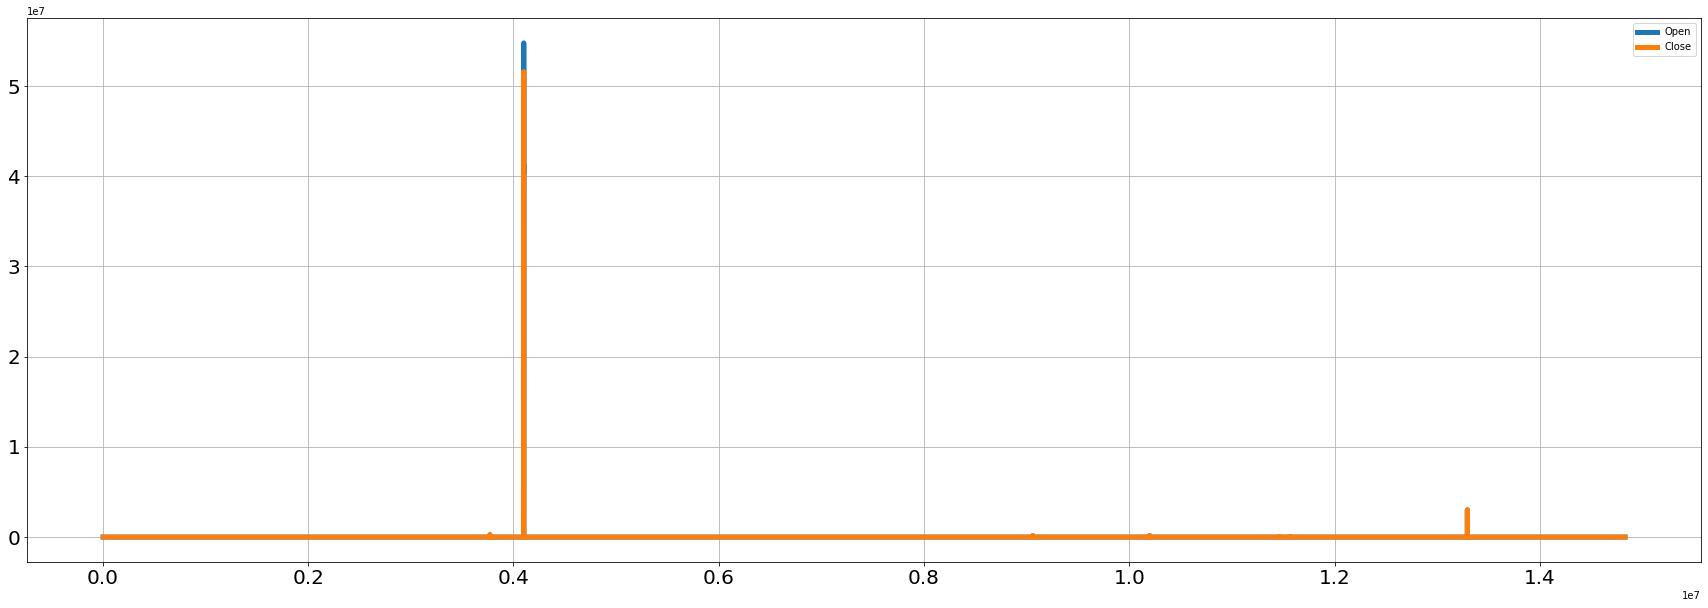

In [47]:

stock_data_filtered[['Open','Close']].plot(figsize=(30,10), linewidth=5, fontsize=20, grid=True)
#stock_data_filtered[].plot(figsize=(30,10), linewidth=5, fontsize=20, grid=True)

##Graph representating multiple combinations of features ( Correlation graph )


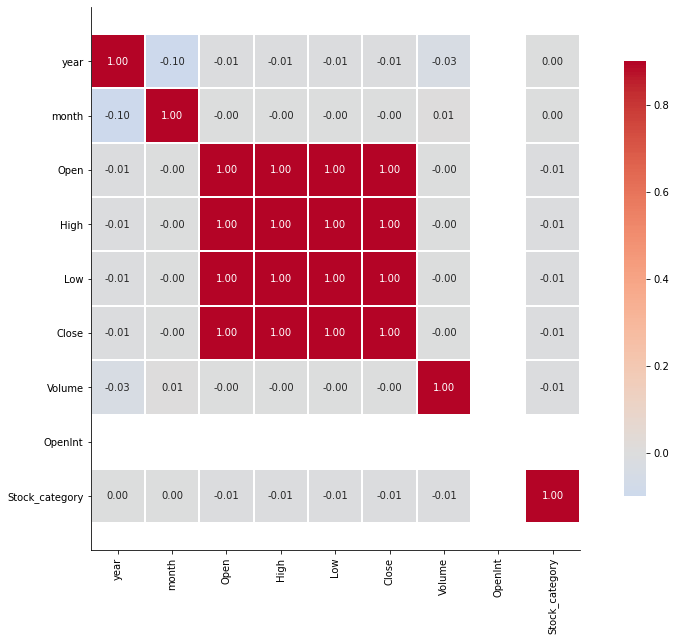

In [48]:
corr = stock_data_filtered.corr()
g = sns.heatmap(corr, vmax=.9, center=0,
               square=True, linewidths=.9, cbar_kws={"shrink": .8}, annot=True, fmt='.2f', cmap='coolwarm')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
sns.despine()
g.figure.set_size_inches(16, 10)

In [49]:
stock_data_filtered.dtypes

Stock_name        category
year                 int64
month                int64
Date                object
Open               float64
High               float64
Low                float64
Close              float64
Volume               int64
OpenInt              int64
month_str           object
date_str            object
Stock_category       int16
dtype: object

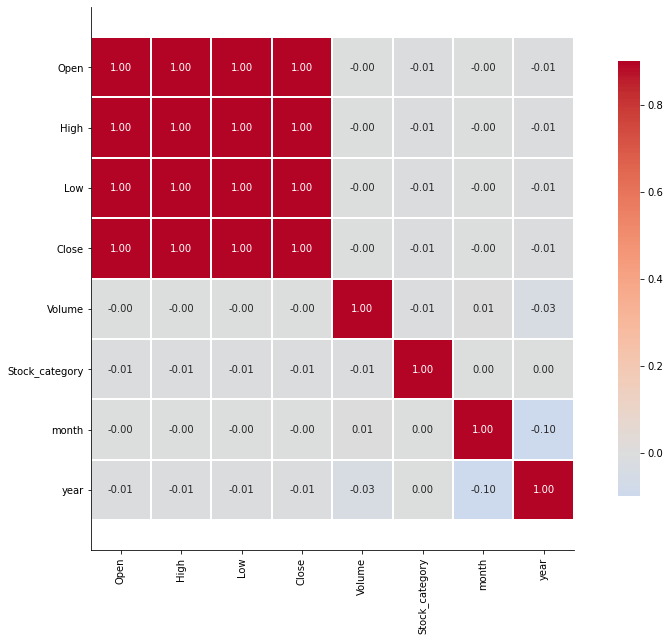

In [50]:
corr = stock_data_filtered[['Open','High','Low','Close','Volume','Stock_category','month','year']].corr()
g = sns.heatmap(corr, vmax=.9, center=0,
               square=True, linewidths=.9, cbar_kws={"shrink": .8}, annot=True, fmt='.2f', cmap='coolwarm')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
sns.despine()
g.figure.set_size_inches(16, 10)




##**Feature-wise graphical representation for one stock for 1 year** 

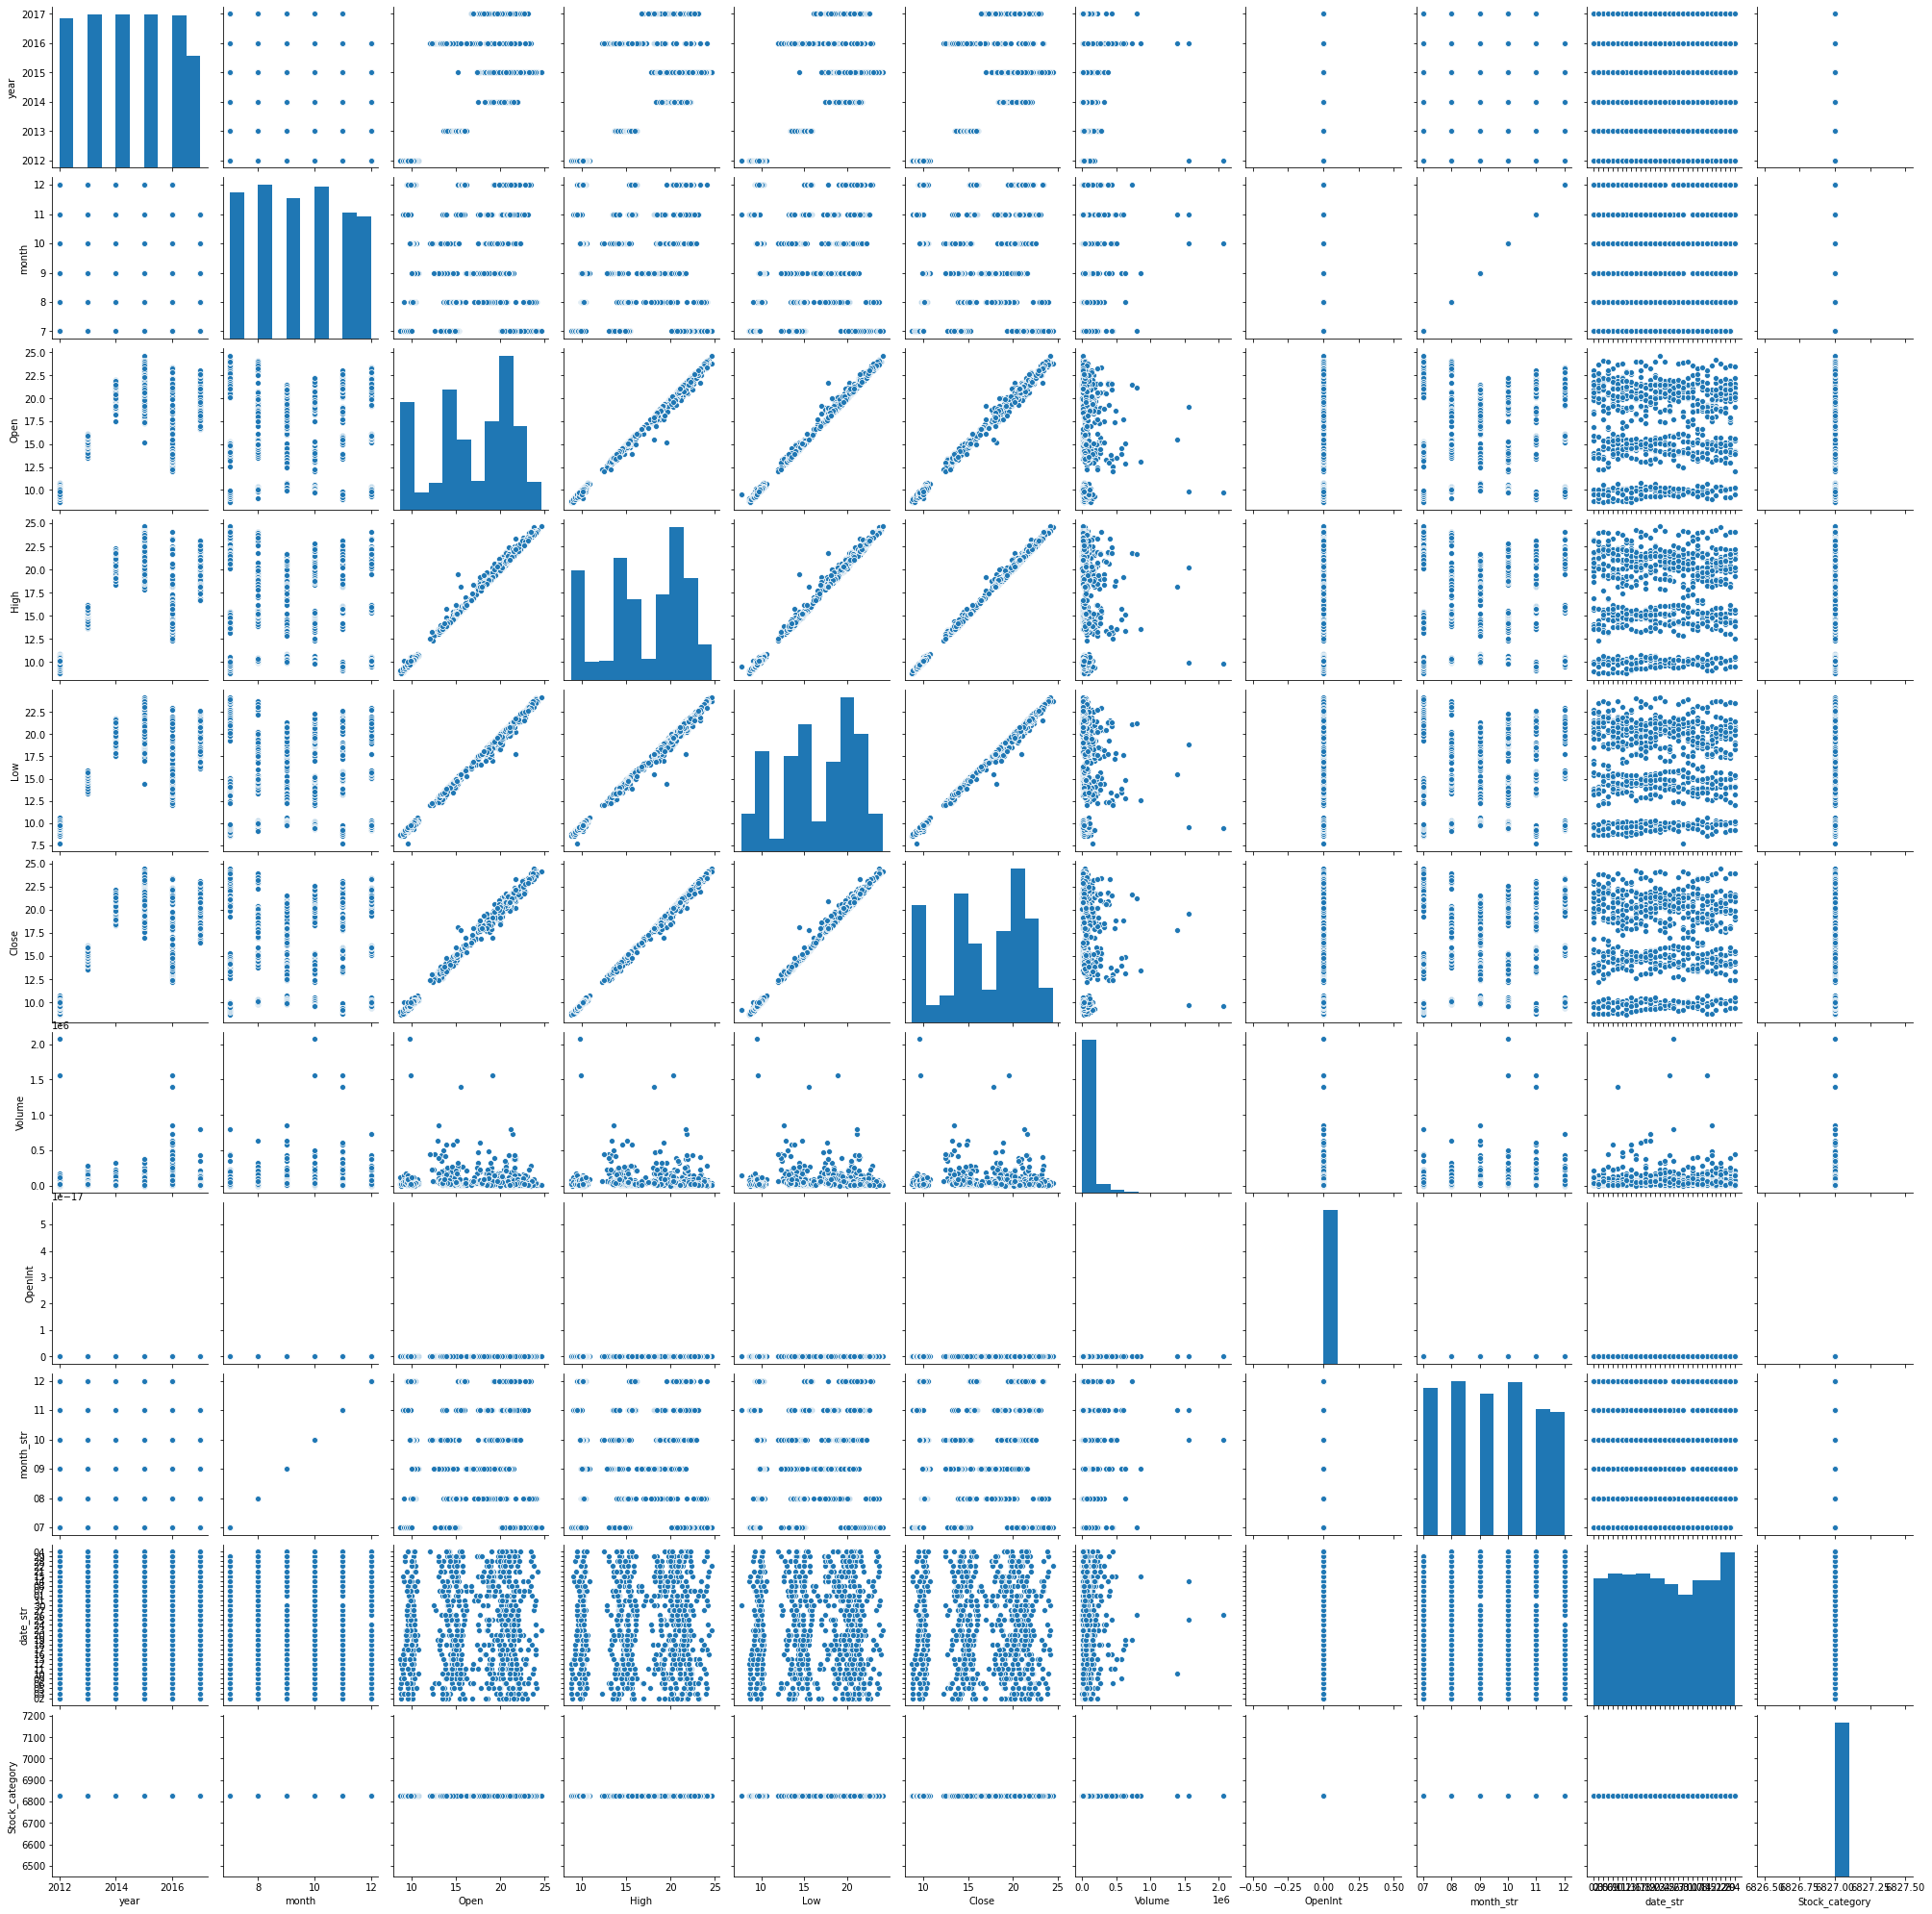

In [51]:
filtered_aaap_stocks = stock_data_filtered[(stock_data_filtered['Stock_name'] == 'wfc')]
sns.pairplot(filtered_aaap_stocks)

#**Annual Return computation and Annual Variance Computation**

In [52]:
first_date_list = [stock_data.query("year == '{}'".format(2010+i)).Date.min() for i in range(8)]
last_date_list = [stock_data.query("year == '{}'".format(2010+i)).Date.max() for i in range(8)]
print(first_date_list)
first_date_df =pd.DataFrame({"Date": first_date_list}) 
last_date_df = pd.DataFrame({"Date": last_date_list})

first_date_df.head()
#first_date_df.dtypes

['2010-01-04', '2011-01-03', '2012-01-03', '2013-01-02', '2014-01-02', '2015-01-02', '2016-01-04', '2017-01-03']


,Date
0,2010-01-04
1,2011-01-03
2,2012-01-03
3,2013-01-02
4,2014-01-02


In [0]:
# filtering for the first day data in `Stock data`
first_date_df = (
    stock_data
    .merge(first_date_df, on='Date', how='inner')
    .pipe(lambda x: x.assign(year=x.Date.str[:4]))
    .rename(columns={"Open": "open_first_day"})
    .reset_index(drop=True)

    [['Stock_name', 'year', 'open_first_day']]
    .pivot_table(values='open_first_day', columns='year', index='Stock_name', aggfunc='sum')
    .rename_axis(None, axis=1)
    .reset_index()
)

In [0]:
# filtering for the last day data in `Stock data`


last_date_df = (
    stock_data
    .merge(last_date_df, on='Date', how='inner')
    .pipe(lambda x: x.assign(year=x.Date.str[:4]))
    .rename(columns={"Close": "close_last_day"})
    .reset_index(drop=True)
    [['Stock_name', 'year', 'close_last_day']]
    .pivot_table(values='close_last_day', columns='year', index='Stock_name', aggfunc='sum')
    .rename_axis(None, axis=1)
    .reset_index()
)


In [55]:
first_date_df.head()

,Stock_name,2010,2011,2012,2013,2014,2015,2016,2017
0,a,21.245,28.054,24.185,28.751,39.330,40.034,40.342,45.621
1,aa,34.386,33.031,18.793,18.916,22.737,34.562,20.948,28.600
2,aaap,NaN,NaN,NaN,NaN,NaN,NaN,30.750,27.060
3,aaba,16.900,16.670,16.270,20.160,40.370,50.660,32.120,39.110
4,aac,NaN,NaN,NaN,NaN,NaN,30.870,18.880,7.290


In [0]:

# merging 2012-2017 data with 2018 data
agg_first_date_df = (
    first_date_df
    # .merge(first_date_2018_df, on='ticker', how='inner')
    # .rename(columns=({2018: "2018"}))
    .melt(id_vars='Stock_name', value_vars=['2010','2011', '2012', '2013', '2014', '2015', '2016', '2017'])
    .rename(columns={"variable": "year", "value": "open_first_day"})
)

agg_last_date_df = (
    last_date_df
    # .merge(last_date_2018_df, on='ticker', how='inner')
    # .rename(columns=({2018: "2018"}))
    .melt(id_vars='Stock_name', value_vars=['2010','2011','2012', '2013', '2014', '2015', '2016', '2017'])
    .rename(columns={"variable": "year", "value": "close_last_day"})
)

In [57]:
agg_first_date_df.head()

,Stock_name,year,open_first_day
0,a,2010,21.245
1,aa,2010,34.386
2,aaap,2010,NaN
3,aaba,2010,16.900
4,aac,2010,NaN


In [0]:
# calculating yearly return and then averaging them to get average yearly returns for each stock
agg_gains_df = (
    agg_first_date_df
    .merge(agg_last_date_df, on=['Stock_name', 'year'], how='inner')
    .pipe(lambda x: x.assign(gains_dollar=x.close_last_day-x.open_first_day))
    .pipe(lambda x: x.assign(gains_pctg=x.gains_dollar/x.open_first_day))
    .groupby("Stock_name")
    .agg({"gains_pctg": "mean"})
    .reset_index()
    .rename(columns={"gains_pctg": "avg_yearly_returns"})
)

# calculating overall variance using each year's return
agg_var_df = (
    agg_first_date_df
    .merge(agg_last_date_df, on=['Stock_name', 'year'], how='inner')
    .pipe(lambda x: x.assign(gains_dollar=x.close_last_day-x.open_first_day))
    .pipe(lambda x: x.assign(gains_pctg=x.gains_dollar/x.open_first_day))
    [['Stock_name', 'gains_pctg']]
    .groupby("Stock_name")
    .agg(np.var)
    .reset_index()
    .rename(columns={"gains_pctg": "yearly_variance"})
)

agg_df3 = (
    agg_gains_df
    .merge(agg_var_df, on='Stock_name', how='inner')
)

##Aggregated data with annual returns and annual variance

In [59]:
agg_df3.head()

,Stock_name,avg_yearly_returns,yearly_variance
0,a,0.162841,0.043631
1,aa,0.083507,0.138092
2,aaap,0.931426,2.252217
3,aaba,0.262058,0.197559
4,aac,-0.150591,0.378998


##Graph representing feature comparison 


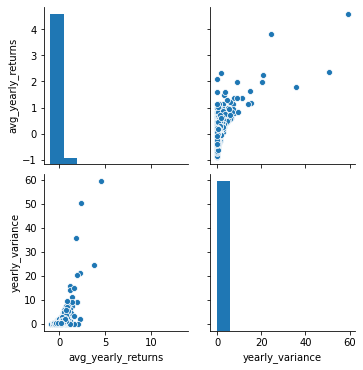

In [60]:
sns.pairplot(agg_df3)

In [0]:
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler


In [0]:
# clean na data before clustering
agg_df3['avg_yearly_returns'] = agg_df3['avg_yearly_returns'].fillna(0)
agg_df3['yearly_variance'] = agg_df3['yearly_variance'].fillna(0)

##**Elbow curve**


In [0]:
data = agg_df3.drop('Stock_name', axis =1)

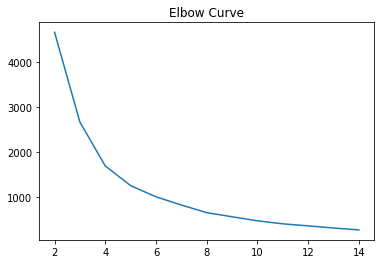

In [64]:
X =  data.values #Converting ret_var into nummpy array
sse = []
for k in range(2,15):
    
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    
    sse.append(kmeans.inertia_) #SSE for each n_clusters
plt.plot(range(2,15), sse)
plt.title("Elbow Curve")
plt.show()

#Silhouette score and graph


In [0]:
def plot_cluster(df, max_loop=50):
    """
    Looking at the performance of various number of clusters using K-Means.
    Performance is evaluated by within cluster SSE and silhouette score.
    """
    try:
        df.drop('cluster', axis=1, inplace=True)
    except:
        next
    X = df.iloc[:,1:]
    
    # robust scaling is used so that the centering and scaling statistics are therefore not influenced by a few number of very large marginal outliers as they are based on percentiles
    rb = RobustScaler()
    X_rb = rb.fit_transform(X)
    
    sse_within_cluster = {}
    silhouette_score = {}
    
    for k in range(2, max_loop):
        kmeans = KMeans(n_clusters=k,  random_state=10, n_init=10, n_jobs=-1)
        kmeans.fit(X_rb)
        sse_within_cluster[k] = kmeans.inertia_
        silhouette_score[k] = metrics.silhouette_score(X_rb, kmeans.labels_, random_state=10)

    _ = plt.figure(figsize=(10,6))
    ax1 = plt.subplot(211)
    _ = plt.plot(list(sse_within_cluster.keys()), list(sse_within_cluster.values()))
    _ = plt.xlabel("Number of Clusters")
    _ = plt.ylabel("SSE Within Cluster")
    _ = plt.title("Within Cluster SSE After K-Means Clustering")
    _ = plt.xticks([i for i in range(2, max_loop)], rotation=75)
    
    ax2 = plt.subplot(212)
    _ = plt.plot(list(silhouette_score.keys()), list(silhouette_score.values()))
    _ = plt.xlabel("Number of Clusters")
    _ = plt.ylabel("Silhouette Score")
    _ = plt.title("Silhouette Score After K-Means Clustering")
    _ = plt.xticks([i for i in range(2, max_loop)], rotation=75)
    
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5, wspace=0.35)

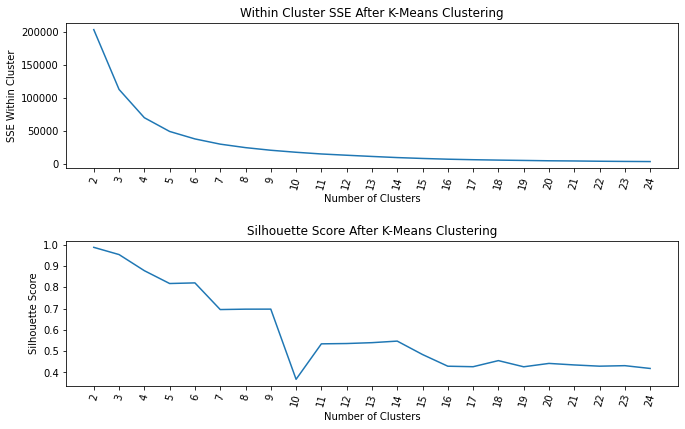

In [66]:
plot_cluster(agg_df3, max_loop=25)

In [0]:
def apply_cluster(df, clusters=2):
    """
    Applying K-Means with the optimal number of clusters identified
    """
    try:
        df.drop('cluster', axis=1, inplace=True)
    except:
        next
    X = df.iloc[:,1:]
    rb = RobustScaler()
    X_rb = rb.fit_transform(X)
    kmeans = KMeans(n_clusters=clusters, random_state=10, n_init=10, n_jobs=-1)  
    kmeans.fit(X_rb) 
    score = metrics.silhouette_score(X_rb, kmeans.labels_, random_state=10)
    df['cluster'] = kmeans.labels_
    sse_within_cluster = kmeans.inertia_
    
    print("clustering performance")
    print("-----------------------------------")
    print("silhouette score: " + str(score.round(2)))
    print("sse withing cluster: " + str(sse_within_cluster.round()))
    
    return df

In [68]:
first_trial = apply_cluster(agg_df3, clusters=14)

clustering performance
-----------------------------------
silhouette score: 0.55
sse withing cluster: 9889.0


In [69]:
cluster_perf_df = (
    first_trial
    .groupby('cluster')
    .agg({"avg_yearly_returns":"mean", "yearly_variance":"mean", "Stock_name":"count"})
    .sort_values('avg_yearly_returns')
    .reset_index()
)

cluster_perf_df

,cluster,avg_yearly_returns,yearly_variance,Stock_name
0,12,-0.299328,0.112587,613
1,6,0.093956,0.041063,5101
2,0,0.186180,0.359442,893
3,7,0.295740,1.053125,295
4,5,0.529226,2.425396,99
5,11,0.810737,4.966689,18
6,2,1.063782,7.621343,11
7,8,1.338734,13.989962,4
8,13,1.344987,0.064107,41
9,1,1.802707,35.696211,1


##**Clustering**

#Team- *Each team member has submitted their implementation separately* -K-Means Clustering with Tensorflow

In [0]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import SpectralClustering
from sklearn.cluster import Birch
import tensorflow as tf

In [71]:
data_src= agg_df3
tock_names = data_src.Stock_name.values

# Dropping stock_name from data to plot
data_to_fit = data_src.copy().drop('Stock_name', axis=1)

# Getting data as values for clustering algorithms
data_to_fit = data_to_fit.values
print (data_to_fit)

[[ 0.16284061  0.04363085  6.        ]
 [ 0.0835071   0.13809171  6.        ]
 [ 0.93142646  2.25221684  5.        ]
 ...
 [-0.10133109  0.11811447 12.        ]
 [ 0.          0.          6.        ]
 [ 0.17470717  0.34359982  0.        ]]


In [72]:
points = data_to_fit

def input_fn():
  return tf.train.limit_epochs(
      tf.convert_to_tensor(points, dtype=tf.float32), num_epochs=1)

#number of clusters
num_clusters = 4
num_iterations = 20


kmeans = tf.estimator.experimental.KMeans(num_clusters=num_clusters, use_mini_batch=False)

# training model
previous_centers = None
for _ in range(num_iterations):
  kmeans.train(input_fn)
  cluster_centers = kmeans.cluster_centers()
  previous_centers = cluster_centers



AttributeError: ignored

In [0]:
# map the input points to their clusters and centers
cluster_indices = list(kmeans.predict_cluster_index(input_fn))
for i, point in enumerate(points):
  cluster_index = cluster_indices[i]
  center = cluster_centers[cluster_index]
  print('centers',center)

In [0]:
plt.scatter(data_to_fit[:,0],data_to_fit[:,1], s=150,marker='o',edgecolors='black' ,c = cluster_indices, cmap ="rainbow")
plt.title('K-Means Clustering with Tensorflow') 
plt.gcf().set_size_inches(22,8)
plt.show()

#Subarna [SJSU ID: 014549587] - OPTICS clustering algorithm

In [0]:
from sklearn.cluster import OPTICS, cluster_optics_dbscan
from matplotlib import gridspec 

# Building the OPTICS Clustering model 
optics_model = OPTICS(min_samples = 30, xi = 0.8, min_cluster_size = 0.08)

# Training the model 
optics_model.fit(data_to_fit) #agg_df3 #data_to_fit
print('number of hierarchical clusters',len(optics_model.cluster_hierarchy_)-1)

In [0]:



fig, ax = plt.subplots()

scatter = ax.scatter(data_to_fit[:,0],data_to_fit[:,1], s=150,marker='o',edgecolors='black' ,c = optics_model.labels_, cmap ="rainbow")
classes = ['1', '2', '3','4']
# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(), loc="upper left", title="Clusters")
ax.add_artist(legend1)

# produce a legend with a cross section of sizes from the scatter
handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
legend2 = ax.legend(handles, labels, loc="upper right", title="Sizes")
plt.title('OPTICS Clustering') 
plt.gcf().set_size_inches(22,8)
plt.show()

In [0]:
# the specified range 
space = np.arange(len(data_to_fit)) 
  
# Storing the reachability distance of each point 
reachability = optics_model.reachability_[optics_model.ordering_] 
  
# Storing the cluster labels of each point 
labels = optics_model.labels_[optics_model.ordering_] 
#print(labels)


In [0]:
# Defining the framework of the visualization 
plt.figure(figsize =(10, 7)) 
G = gridspec.GridSpec(2, 3) 
ax1 = plt.subplot(G[0, :])

 

# Plotting the Reachability-Distance Plot 
colors = ['c.', 'b.', 'r.', 'y.', 'g.'] 
for Class, colour in zip(range(0, 5), colors): 
    Xk = space[labels == Class] 
    Rk = reachability[labels == Class] 
    ax1.plot(Xk, Rk, colour, alpha = 0.3) 
ax1.plot(space[labels == -1], reachability[labels == -1], 'k.', alpha = 0.3) 
ax1.plot(space, np.full_like(space, 2., dtype = float), 'k-', alpha = 0.5) 
ax1.plot(space, np.full_like(space, 0.5, dtype = float), 'k-.', alpha = 0.5) 
ax1.set_ylabel('Reachability Distance') 
ax1.set_title('Reachability Plot')

#Spectral Clustering [By other team member- Pranav Lodha]

In [0]:
clustering = SpectralClustering(n_clusters=4, assign_labels="discretize", random_state=0).fit(data_to_fit)

In [0]:
clustering.labels_

In [0]:
plt.scatter(data_to_fit[:,0],data_to_fit[:,1], c = clustering.labels_, cmap ="rainbow")
plt.show()

#Birch Clustering [By other team member- Wasae Qureshi]

In [0]:
brc = Birch(n_clusters=4)
brc.fit(data_to_fit)
labels = brc.predict(data_to_fit)

In [0]:
plt.scatter(data_to_fit[:,0],data_to_fit[:,1], c = labels, cmap ="rainbow")
plt.show()

In [0]:
agg_df3.head()

##DBSCAN [By other team member- Jeyasri Subramanian]

In [0]:
from sklearn.cluster import DBSCAN


db = DBSCAN(eps=0.3, min_samples=10).fit(data_to_fit)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(data_to_fit, labels))




In [0]:
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = data_to_fit[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = data_to_fit[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)
plt.title('DBSCAN Clustering') 
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.gcf().set_size_inches(22,8)
plt.show()
#DBSCAN(eps=3, min_samples=2)

#**Outlier Detection and Removal**

From the Outlier detection, we have identified few stocks have a wider annual variance in a particular year compared to other years, some stocks have large returns in a particular year compared to other year. Considering these anamoly, we are removing around 9 stocks from our further computation process. This results in 1% data reduction to the overall volume

In [0]:
#outliers
 print(agg_df3)
 agg_df3[(agg_df3['yearly_variance'] > 20) | (agg_df3['avg_yearly_returns'] > 4) ]

In [0]:
outlier_free_data= agg_df3[(agg_df3['yearly_variance'] < 20) & (agg_df3['avg_yearly_returns'] < 4) ]
outlier_free_data

In [0]:
stock_names = outlier_free_data.Stock_name.values
# Dropping stock_name from data to plot
data_to_fit_outlier_free = outlier_free_data.copy().drop('Stock_name', axis=1)

# Getting data as values for clustering algorithms
data_to_fit_outlier_free = data_to_fit_outlier_free.values
print (len(data_to_fit_outlier_free))

In [0]:
def input_fn():
  return tf.train.limit_epochs(
      tf.convert_to_tensor(data_to_fit_outlier_free, dtype=tf.float32), num_epochs=1)

num_clusters = 4
kmeans = tf.estimator.experimental.KMeans(
    num_clusters=num_clusters, use_mini_batch=False)

# train
num_iterations = 20
previous_centers = None
for _ in range(num_iterations):
  kmeans.train(input_fn)
  cluster_centers = kmeans.cluster_centers()
  if previous_centers is not None:
    print('delta:', cluster_centers - previous_centers)
  previous_centers = cluster_centers
  print('score:', kmeans.score(input_fn))
print('cluster centers:', cluster_centers)

# map the input points to their clusters
cluster_indices = list(kmeans.predict_cluster_index(input_fn))
for i, point in enumerate(data_to_fit_outlier_free):
  cluster_index = cluster_indices[i]
  center = cluster_centers[cluster_index]
  print('point:', point, 'is in cluster', cluster_index, 'centered at', center)

In [0]:
plt.scatter(data_to_fit_outlier_free[:,0],data_to_fit_outlier_free[:,1],s=150, edgecolors='black' , c = cluster_indices, cmap ="rainbow")
plt.title('Outlier Free Stock Data')
plt.gcf().set_size_inches(22,10)
plt.show()

##**Clustering results analysis**

**Why PCA is not applicable for this data-set :**

PCA (Principle Component Analysis) is a statistical procedure used for feature reduction. In our case, we have only 10 features/columns in stock raw data [Stock_name,year	,month,Date,Open,High,Low,Close,Volume,OpenInt], which is very few. Moreover, among these features we have used period and Open- Close values to compute annual return and annual variance. Therefore we don't have redundant features here for reduction. That's why PCA is not applicable for this particular data set we have chosen for this assignment.

Insights:
    In general we can say that higher the variance, the more risk is involved in that stock, and lower the variance the safer the stock. This goes hand in hand with annual returns, where higher the return, higher the variance, and lower the returns, lower the variance.

    K-Means
     We drew up the elbow graph to identify the optimal cluster and noticed that between 4 and 6 clusters was optimal. We have also plotted silhouette value to measure how similar my data point is to its own cluster (cohesion) compared to other clusters (separation) and to chose the number of clusters that maximizes the silhouette coefficient.
	Considering all these factors from elbow graph and silhouette coefficient, I have decided to implement K-means with TensorFlow with cluster 4. This shows us that the purple points are medium to high risk with high returns. It can also be observed from the scatter plot that
	first cluster (red) is very low risk, but does not have many good return stocks.  A good cluster to select stocks from will be the light brown cluster. This falls right in the middle, with medium risk and medium returns. This will guarantee us a good stock picking strategy. 

    Spectral
    For spectral clustering we also had 3 clusters. These were spread out much more evenly that those provided by K-means. We saw a fine distinction between cluster 1, where most of the stocks went, and cluster 4, which had a mere two stocks. Once again in this we would go with the middle cluster, which showed good results, that gave us a safe pick with good returns.

    Birch
    Birch clustering turned out similar to that of Spectral. We had 4 clusters, which were well spread out from each other. Unlike Spectral clustering, cluster two of birch showed the most potential as it had a mix of risky stocks and good returns. 

    Optics Clustering
    OPTICS (Ordering Points To Identify Clustering Structure) algorithm has been chosen as another clustering algorithm which is a density based clustering algorithm.  Here aim is to look into our stock data from a different angle and to find the density based clustering property inside our stock data. OPTICS is an extension of DBSCAN and it is much less sensitive to parameter setting because it finds clustering structure. Three parameters have been used called min_samplesint, xi value and min_cluster_sizeint for my optics model. Min_samplesint is the number of neighbourhood points for a considerate core point. Xi point describes the minimum steepness on the reachability plot and min_cluster_sizeint is the minimum number of points in an OPTICS cluster.  
    The OPTICS clustering method groups stock data into 4 clusters. From the scatter plot it is clear that purple cluster is the most densely populated  and dominant one. Then comes the green, red and blue clusters. Cluster number legends in scatter plot are just numbers starting from -1. Details have been given above about the parameters used here. Parameter values that are set after some trial run which seems to be the best fit for this data.  Here dense clusters are deeply nested in lower density clusters. So all the high density clusters such as red, green, blue are nested inside. Scatter plot result is also matching with the reachability plot which clearly shows the distinguishable clusters. Now using this density based clustering method on our stock data, we are getting an idea of cluster structure, we can remove outliers to get better refined information about the stock market and most insightful information is to identify small influential group of stocks to invest in.

    DBSCAN
    Similar to optics clustering, we did not get that promising results from DBSCAN. We once again wanted smaller size clusters. And with clusters being of variable sizes, we assumed that that would be possible. We also noticed that the DBSCAN corrected for 52 error points (outliers) in the dataset, and a Silhouette Coefficient of 0.890. These led to 6 different clusters, that summarized the data based on the outliers.
    So many of the points were close together in clusters, and all the outliers were together in even sized clusters. 

    Summary
    In generally we wanted to find stocks that had medium risk with good returns on our investment. Annual return and Annual variance were two good metrics that we used to build the proper clusters.
    We got the best results from Birch and Spectral clustering, which gave us well sized clusters, that provided us with safe options and good returns.


**References:** 
1. https://medium.com/uptick-blog/stock-picks-using-k-means-clustering-4330c6c4e8de
2. https://scikit-learn.org/stable/modules/generated/sklearn.cluster.OPTICS.html
3. https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html
4. https://www.dbs.ifi.lmu.de/Publikationen/Papers/OPTICS.pdf
5. https://www.altoros.com/blog/using-k-means-clustering-in-tensorflow/